In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data= pd.read_csv("/content/train.csv.zip")

In [8]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data =np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev / 255.

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_,m_train = x_train.shape

In [10]:
print("m :->", m, "n :->", n)
print("data_dev :->", data_dev)
print("y_dev :->", y_dev)
print("x_dev :->", x_dev)
print("y_train :->", y_train)
print("x_train :->",x_train)
print("_ :->", _)
print("m_train :->", m_train)

m :-> 42000 n :-> 785
data_dev :-> [[5 0 0 ... 7 5 6]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y_dev :-> [5 0 0 4 1 9 2 1 9 5 5 7 1 0 3 5 4 3 3 1 2 7 6 8 9 4 4 1 9 0 7 9 8 8 3 8 1
 1 8 0 4 7 0 5 3 2 3 5 7 7 5 0 0 7 5 1 2 3 5 3 7 9 2 5 6 8 3 8 9 9 6 9 8 3
 4 2 6 3 8 0 6 3 4 2 0 3 7 9 7 6 6 8 6 6 9 8 0 4 0 4 3 4 5 2 2 2 1 1 4 6 0
 9 7 1 7 7 8 6 7 6 0 4 4 0 7 0 0 3 4 6 6 4 0 6 2 4 2 8 1 7 6 3 2 4 8 2 9 9
 9 7 8 1 0 8 4 7 2 2 3 4 8 8 6 3 8 6 0 7 2 5 4 8 2 8 5 9 6 1 0 8 0 7 9 3 4
 6 1 9 0 3 3 6 6 7 1 9 7 7 4 9 2 3 1 7 2 9 9 2 1 8 6 3 6 4 8 1 1 0 0 7 4 2
 2 8 3 2 2 9 2 2 7 2 5 9 1 5 1 8 3 6 5 4 4 9 5 9 2 4 3 7 2 3 6 5 2 3 4 5 8
 2 4 6 1 7 6 4 3 5 5 4 9 9 0 1 1 3 2 3 8 5 1 6 3 1 5 9 0 7 5 4 2 0 6 2 2 4
 4 9 0 4 5 2 0 3 4 6 9 4 0 8 7 5 4 9 2 1 4 5 7 3 4 9 5 2 7 4 7 7 4 3 1 1 2
 0 5 9 3 0 1 5 3 9 9 0 3 1 3 4 4 8 1 3 0 0 5 1 5 8 1 4 3 1 0 4 1 0 1 1 6 8
 7 1 2 1 8 5 8 0 1 8 4 7 8 4 9 1 1 5 6 9 1 4 8 6 5 9 7 9 8 1 0 8 5 0 1 6 4
 5 7 6 1 3

In [11]:
m

42000

In [12]:
def init_params():
  w1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  w2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return w1, b1, w2, b2

def Relu(z):
  return np.maximum(z, 0)

def softmax(z):
  A= np.exp(z) / sum(np.exp(z))
  return A

def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    A1 = Relu(z1)
    z2 = w2.dot(A1) + b2
    A2 = softmax(z2)
    return z1, A1, z2, A2

def relu_derivative(z):
  return z > 0

def one_hot(y):
  one_hot_y = np.zeros((y.size, y.max() + 1))
  one_hot_y[np.arange(y.size), y] = 1
  one_hot_y = one_hot_y.T
  return one_hot_y

def backward_propagation(z1, A1, z2, A2, w1, w2, x, y):
  one_hot_y = one_hot(y)
  d_z2 = A2 - one_hot_y
  d_w2 = 1/m * d_z2.dot(A1.T)
  d_b2 = 1/m * np.sum(d_z2)

  d_z1 = w2.T.dot(d_z2) * relu_derivative(z1)
  d_w1 = 1/m * d_z1.dot(x.T)
  d_b1 = 1/m * np.sum(d_z1)
  return d_w1, d_b1, d_w2, d_b2


def update_params(w1, b1, w2, b2, d_w1, d_b1, d_w2, d_b2, alpha):
    w1 = w1 - alpha * d_w1
    b1 = b1 - alpha * d_b1
    w2 = w2 - alpha * d_w2
    b2 = b2 - alpha * d_b2
    return w1, b1, w2, b2

In [13]:

def get_prediction(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, y):
  print(predictions, y)
  return np.sum(predictions == y)/ y.size

def gradient_descent(x, y,alpha, iterations):
    w1, b1, w2, b2 = init_params()

    for i in range(iterations):
       z1, A1, z2, A2 = forward_prop(w1, b1, w2, b2, x)
       d_w1, d_b1, d_w2, d_b2 = backward_propagation(z1, A1, z2, A2, w1, w2, x, y)
       w1, b1, w2, b2 = update_params(w1, b1, w2, b2, d_w1, d_b1, d_w2, d_b2, alpha)

       if i % 10 == 0 :
         print(i)
         predictions = get_prediction(A2)
         print(get_accuracy(predictions, y))
    return w1, b1, w2, b2


In [14]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 0.10, 600)


0
[4 9 4 ... 4 9 9] [8 0 4 ... 2 3 2]
0.09302439024390244
10
[4 9 4 ... 4 4 6] [8 0 4 ... 2 3 2]
0.14841463414634146
20
[4 0 4 ... 1 4 6] [8 0 4 ... 2 3 2]
0.2079512195121951
30
[4 0 4 ... 1 4 6] [8 0 4 ... 2 3 2]
0.2723170731707317
40
[0 0 4 ... 1 6 6] [8 0 4 ... 2 3 2]
0.33226829268292685
50
[0 0 4 ... 1 1 6] [8 0 4 ... 2 3 2]
0.3942439024390244
60
[0 0 4 ... 1 1 6] [8 0 4 ... 2 3 2]
0.4498780487804878
70
[8 0 4 ... 1 1 6] [8 0 4 ... 2 3 2]
0.4952439024390244
80
[8 0 4 ... 1 1 6] [8 0 4 ... 2 3 2]
0.5346585365853659
90
[8 0 4 ... 1 1 6] [8 0 4 ... 2 3 2]
0.5710487804878048
100
[8 0 4 ... 1 1 6] [8 0 4 ... 2 3 2]
0.6002926829268292
110
[8 0 4 ... 1 3 6] [8 0 4 ... 2 3 2]
0.625
120
[8 0 4 ... 1 3 6] [8 0 4 ... 2 3 2]
0.645219512195122
130
[8 0 4 ... 1 3 6] [8 0 4 ... 2 3 2]
0.6635609756097561
140
[8 0 4 ... 1 3 6] [8 0 4 ... 2 3 2]
0.6791463414634147
150
[8 0 4 ... 1 3 6] [8 0 4 ... 2 3 2]
0.6926585365853658
160
[8 0 4 ... 1 3 6] [8 0 4 ... 2 3 2]
0.7049756097560975
170
[8 0 4 ... 1 3 

In [25]:
def make_predictions(x, w1, b1, w2, b2):
  _, _, _, A2 = forward_prop(w1, b1, w2, b2, x)
  predictions = get_prediction(A2)
  return predictions

def test_prediction(index, w1, b1, w2, b2):
  current_image = x_train[:, index, None]
  prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
  label = y_train[index]
  print(prediction)
  print(label)

  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation = "nearest")
  plt.show()


[8]
8


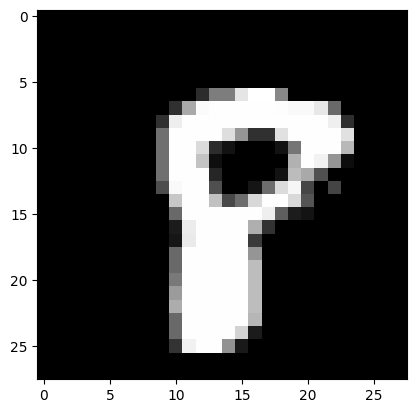

[4]
4


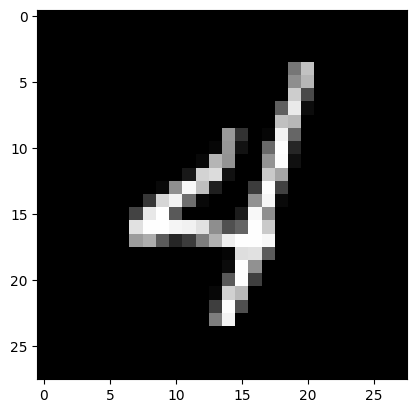

[3]
3


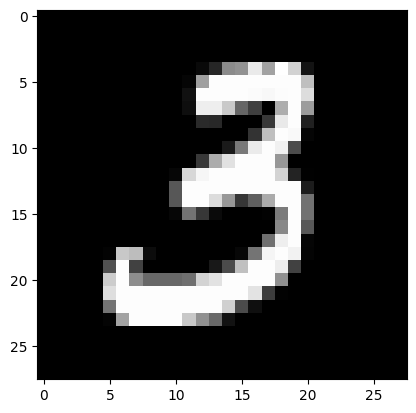

[7]
7


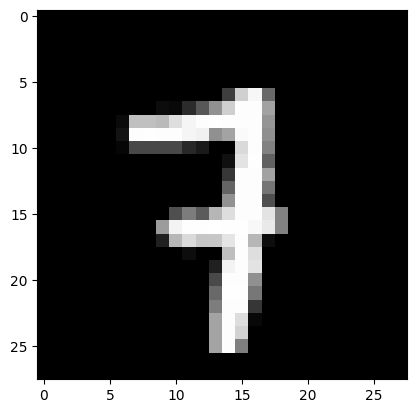

[5]
5


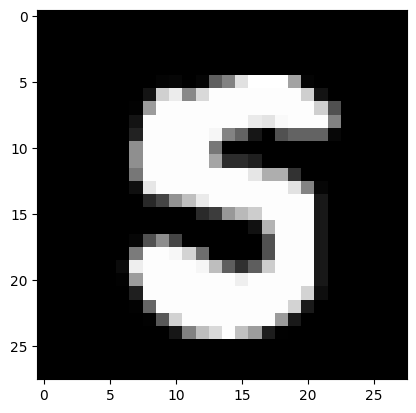

[0]
0


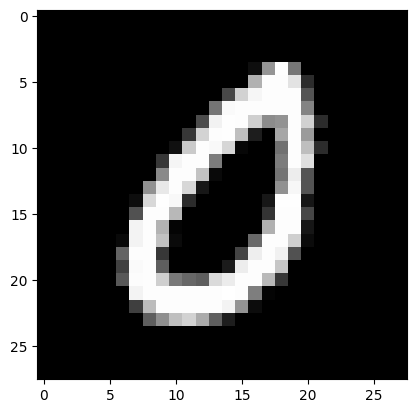

[6]
6


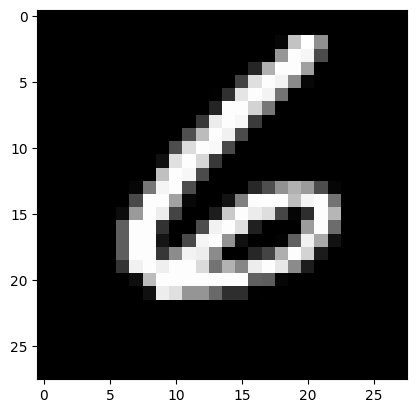

In [28]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)
test_prediction(4, w1, b1, w2, b2)
test_prediction(5, w1, b1, w2, b2)
test_prediction(6, w1, b1, w2, b2)
test_prediction(7, w1, b1, w2, b2)

In [30]:
dev_predictions = make_predictions(x_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, y_dev)

[5 0 0 4 1 7 2 1 9 5 1 7 1 0 3 5 4 8 3 1 7 7 6 8 9 9 4 1 9 0 7 9 8 8 3 8 1
 1 3 0 4 7 0 5 3 4 3 5 7 7 8 0 0 7 5 1 2 8 5 8 7 5 2 3 6 8 3 8 9 7 6 9 8 3
 4 2 6 3 8 0 6 2 4 2 0 3 7 9 7 6 0 8 6 6 9 8 0 4 0 4 3 4 5 2 4 2 1 1 6 6 0
 9 7 1 2 7 8 6 7 6 0 4 4 0 7 0 0 3 4 6 6 6 0 6 2 4 2 8 1 7 6 3 2 4 3 2 9 9
 9 7 8 1 0 8 4 7 2 2 3 4 8 3 6 3 8 6 0 7 2 5 4 8 2 8 5 9 6 1 0 8 0 7 9 3 9
 6 1 9 0 3 3 6 6 7 1 9 7 7 4 9 2 3 1 7 2 7 9 2 1 8 6 3 6 4 8 1 1 0 0 7 4 2
 2 8 3 2 2 9 2 2 7 7 5 9 1 5 1 8 3 6 5 6 4 9 5 4 2 4 3 7 2 3 6 5 2 3 4 5 5
 2 9 6 1 7 6 4 3 5 5 4 9 9 0 1 1 3 9 3 8 5 1 6 3 1 5 2 0 7 3 4 2 0 6 2 2 4
 4 9 0 4 9 2 0 3 4 6 9 4 0 8 7 8 4 9 7 1 4 9 7 3 4 8 5 2 7 2 7 7 4 3 1 1 2
 0 5 7 2 0 1 3 3 4 9 0 5 1 3 4 4 8 1 3 0 0 5 1 7 8 1 4 3 7 0 4 7 0 1 1 6 5
 7 1 2 1 8 9 2 0 1 8 4 7 8 7 9 1 1 0 6 4 1 4 8 6 5 9 7 4 8 1 0 8 5 0 1 0 4
 5 7 6 1 3 8 2 9 1 4 7 1 1 6 3 8 8 9 7 1 9 6 0 8 8 2 0 3 7 2 3 0 4 3 9 2 7
 7 9 3 6 3 7 3 2 3 2 1 5 5 0 6 2 1 5 6 1 2 5 5 4 9 3 8 7 8 4 6 7 3 8 9 8 4
 0 2 1 8 1 1 7 1 3 1 2 4 

0.843